In [62]:
import pandas as pd

In [63]:
df = pd.read_csv('../dataset/dataset_2A_label.csv',index_col=0)

### 결측치 수
5000 초과 [제조]임차료(백만원)
1000 초과 [제조]감가상각비(백만원),[제조]인건비(백만원)
500 초과 [제조]조세공과(백만원)
100 초과 [제조]금융비용(백만원)


In [77]:
# Count the number of missing values in each column
missing_values_count = df.isnull().sum()

# Columns with more than 5000 missing values
columns_to_drop = missing_values_count[missing_values_count > 10].index

columns_to_drop

Index(['감사의견코드', '설립일', '기업규모코드', '기업규모명', '총자본증가율', '유형자산증가율', '유동자산증가율',
       '영업이익증가율', '순이익증가율', '재고자산증가율',
       ...
       '운전자본회전률', '1회전기간', '부가가치', '총자본투자효율', '설비투자효율', '기계투자효율', '부가가치율',
       '노동소득분배율', '자본분배율', '이윤분배율'],
      dtype='object', length=122)

In [65]:
df.drop(columns=['법인세비용차감전(계속사업)손익', '인건비', '금융비용',
    '임차료', '조세공과', '감가상각비'], inplace=True)

In [82]:
[col for col in df.columns if col.endswith('증가율')]

['총자본증가율',
 '유형자산증가율',
 '유동자산증가율',
 '영업이익증가율',
 '순이익증가율',
 '재고자산증가율',
 '자기자본증가율',
 '매출액증가율',
 '비유동자산증가율']

In [81]:
df2[df2['회사명'] == '쿠퍼스탠다드오토모티브코리아유한회사']

,회사명,거래소코드,회계년도,총자본증가율,유형자산증가율,유동자산증가율,영업이익증가율,순이익증가율,재고자산증가율,자기자본증가율,...,1회전기간,부가가치,총자본투자효율,설비투자효율,기계투자효율,부가가치율,노동소득분배율,자본분배율,이윤분배율,y
27699,쿠퍼스탠다드오토모티브코리아유한회사,19034,2012-12-01,-6.72,-8.47,-7.00,0.0,0.0,-29.10,0.0,...,0.04,1773.06,5.78,11.99,20.86,3.14,37.53,62.47,-130.97,0
27700,쿠퍼스탠다드오토모티브코리아유한회사,19034,2013-12-01,-4.81,-13.98,7.15,0.0,0.0,-1.84,0.0,...,0.03,3795.42,13.01,29.82,57.04,7.16,37.88,62.12,-32.95,0
27701,쿠퍼스탠다드오토모티브코리아유한회사,19034,2014-12-01,-5.44,-17.10,2.45,0.0,0.0,-17.95,0.0,...,0.03,1854.35,6.72,20.28,32.19,4.29,46.65,53.35,-125.78,0
27702,쿠퍼스탠다드오토모티브코리아유한회사,19034,2015-12-01,-7.94,21.27,-31.48,0.0,0.0,-13.36,0.0,...,0.03,-1528.40,-6.02,-12.91,-20.09,-4.62,0.00,0.00,0.00,0
27703,쿠퍼스탠다드오토모티브코리아유한회사,19034,2016-12-01,9.73,-4.29,30.72,0.0,0.0,-12.53,0.0,...,0.03,-4423.38,-15.87,-41.58,-68.34,-14.40,0.00,0.00,0.00,0
27704,쿠퍼스탠다드오토모티브코리아유한회사,19034,2019-12-01,0.00,0.00,0.00,0.0,0.0,0.00,0.0,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
27705,쿠퍼스탠다드오토모티브코리아유한회사,19034,2020-12-01,-28.54,-8.04,-28.28,0.0,0.0,65.46,0.0,...,0.00,251.08,2.57,15.57,333.83,3.75,103.14,-3.14,-1051.77,0


In [80]:
df2 = df.drop(columns=['감사의견코드', '산업코드', '산업명', '설립일', '기업규모코드',
    '기업규모명', '통계청 한국표준산업분류 코드 10차(대분류)', '통계청 한국표준산업분류 10차(대분류)'])
df2[df2.isna().any(axis=1)]

,회사명,거래소코드,회계년도,총자본증가율,유형자산증가율,유동자산증가율,영업이익증가율,순이익증가율,재고자산증가율,자기자본증가율,...,1회전기간,부가가치,총자본투자효율,설비투자효율,기계투자효율,부가가치율,노동소득분배율,자본분배율,이윤분배율,y
27704,쿠퍼스탠다드오토모티브코리아유한회사,19034,2019-12-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
29656,한국필립모리스주식회사,19647,2022-12-01,19.25,-2.81,82.99,162.70,131.57,12.91,41.02,...,0.03,170306.50,24.50,46.82,88.79,24.80,39.43,60.57,26.62,0
77882,(주)팍트라인터내셔널,48753,2021-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
85481,다임러트럭코리아(주),51204,2020-12-01,-11.00,-21.55,-11.01,19.51,136.97,-37.01,12.05,...,0.01,15565.97,23.95,1257.10,0.00,12.70,60.61,39.39,17.77,0
89748,(주)전우정밀,52179,2020-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
95056,(주)에이치제이라이프피에프브이,53548,2012-12-01,-33.36,-99.38,-32.68,0.00,0.00,-16.34,0.00,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
118129,온양교통운수(주),61059,2021-12-01,-32.41,-1.45,-78.19,0.00,0.00,-25.36,0.00,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
122380,(주)태려,61788,2021-12-01,12.98,12.61,114.15,0.00,0.00,0.00,0.00,...,0.00,-31.17,-0.18,-0.20,0.00,0.00,0.00,0.00,0.00,0
148716,(주)디엔알엔지니어링,68988,2019-12-01,0.66,397.13,-34.90,0.00,0.00,-99.74,33.22,...,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
161151,(주)플라토,72728,2022-12-01,27.22,-0.06,40.98,86.04,-11.43,-45.83,7.66,...,NaN,10255.62,29.11,224.43,0.00,18.86,63.29,36.71,12.91,0


### 0 데이터 개수 컬럼
100000 초과
        '영업이익증가율', '순이익증가율', '외환이익 대 매출액비율', '광고선전비 대 매출액비율', '사내유보율', '평균배당률',
       '자기자본배당률', '배당성향', 'R & D 투자효율', '원재료비율', '재고자산 대 순운전자본비율', '매출채권 대 상',
       '비유동부채 대 순운전자본비율', '상품', '운전자본회전률'

50000 초과
        '재고자산증가율', '자기자본증가율', '조세 대 조세차감전순이익률', '재고자산 대 유동자산비율', '매출채권비율',
    '매출채권 대 매입채무비율', '매입채무 대 재고자산비율', '단기차입금 대 총차입금비율', '차입금비율',
    '영업이익대비이자보상배율', '매입채무회전률', '매입채무회전기간', '재고자산회전률', '재고자산회전기간', '1회전기간',
    '기계투자효율'

25000 초과
        '총자본증가율', '유형자산증가율', '유동자산증가율', '매출액증가율', '비유동자산증가율', '매출액총이익률',
    '자기자본영업이익률', '자기자본순이익률', '매출원가 대 매출액비율', '지급이자율', '차입금평균이자율',
    '사내유보 대 자기자본비율', '적립금비율(재정비율)', 'BPS(Book-value Per Share)(원)', '유보율',
    '자기자본구성비율', '자기자본배율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율',
    '차입금의존도', '유보액대비율', '유보액 대 납입자본배율', 'CASH FLOW 대 차입금비율', '자기자본회전률',
    '매출채권회전률', '매출채권회전기간', '노동소득분배율', '자본분배율', '이윤분배율'

20000 초과
    '감가상각비 대 총비용비율', '누적감가상각률', '유형자산회전율'

In [61]:
# Count the number of zeros in each column
zero_counts = (df == 0).sum()

zero_counts[zero_counts > 15000].index


Index(['감가상각비 대 총비용비율', '감가상각률', '누적감가상각률', '유형자산회전율', '설비투자효율', 'y'], dtype='object')

In [52]:
# df.drop(columns=['영업이익증가율', '순이익증가율', '외환이익 대 매출액비율', '광고선전비 대 매출액비율', '사내유보율', '평균배당률',
#        '자기자본배당률', '배당성향', 'R & D 투자효율', '원재료비율', '재고자산 대 순운전자본비율', '매출채권 대 상',
#        '비유동부채 대 순운전자본비율', '상품', '운전자본회전률'], inplace=True)

In [55]:
# df.drop(columns=['재고자산증가율', '자기자본증가율', '조세 대 조세차감전순이익률', '재고자산 대 유동자산비율', '매출채권비율',
#     '매출채권 대 매입채무비율', '매입채무 대 재고자산비율', '단기차입금 대 총차입금비율', '차입금비율',
#     '영업이익대비이자보상배율', '매입채무회전률', '매입채무회전기간', '재고자산회전률', '재고자산회전기간', '1회전기간',
#     '기계투자효율'], inplace=True)

In [58]:
# df.drop(columns=['총자본증가율', '유형자산증가율', '유동자산증가율', '매출액증가율', '비유동자산증가율', '매출액총이익률',
#     '자기자본영업이익률', '자기자본순이익률', '매출원가 대 매출액비율', '지급이자율', '차입금평균이자율',
#     '사내유보 대 자기자본비율', '적립금비율(재정비율)', 'BPS(Book-value Per Share)(원)', '유보율',
#     '자기자본구성비율', '자기자본배율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율',
#     '차입금의존도', '유보액대비율', '유보액 대 납입자본배율', 'CASH FLOW 대 차입금비율', '자기자본회전률',
#     '매출채권회전률', '매출채권회전기간', '노동소득분배율', '자본분배율', '이윤분배율'], inplace=True)

In [59]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '감사의견코드', '산업코드', '산업명', '설립일', '기업규모코드',
       '기업규모명', '통계청 한국표준산업분류 코드 10차(대분류)', '통계청 한국표준산업분류 10차(대분류)',
       '매출액영업이익률', '매출액순이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자본금영업이익률',
       '자본금순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '영업외손익률',
       '금융비용부담률', '수지비율', '인건비 대 총비용비율', '조세공과 대 총비용비율', '금융비용 대 총비용비율',
       '감가상각비 대 총비용비율', '감가상각률', '누적감가상각률', '이자부담률', '1주당매출액(원)',
       'EPS(Earning Per Share)(원)', 'CPS(Cash flow Per Share)(원)',
       '1주당영업이익(원)', '유동자산구성비율', '유동자산 대 비유동자산비율', '당좌자산구성비율', '비유동자산구성비율',
       '타인자본구성비율', '유동비율', '당좌비율', '현금비율', '순운전자본비율', '이자보상배율(이자비용)',
       '이자보상배율(순금융비용)', '유동자산집중도', '비유동자산집중도', '투자집중도', 'CASH FLOW 대 부채비율',
       'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율', '총자본회전률', '경영자본회전률', '자본금회전률',
       '타인자본회전률', '유동자산회전률', '당좌자산회전률', '비유동자산회전률', '유형자산회전율', '순운전자본회전률',
       '부가가치', '총자본투자효율', '설비투자효율', '부가가치율', 'y'],
      dtype='object')

In [68]:
df2 = df.drop(columns=['회사명', '거래소코드', '회계년도', '감사의견코드', '산업코드', '산업명', '설립일', '기업규모코드',
    '기업규모명', '통계청 한국표준산업분류 코드 10차(대분류)', '통계청 한국표준산업분류 10차(대분류)'])

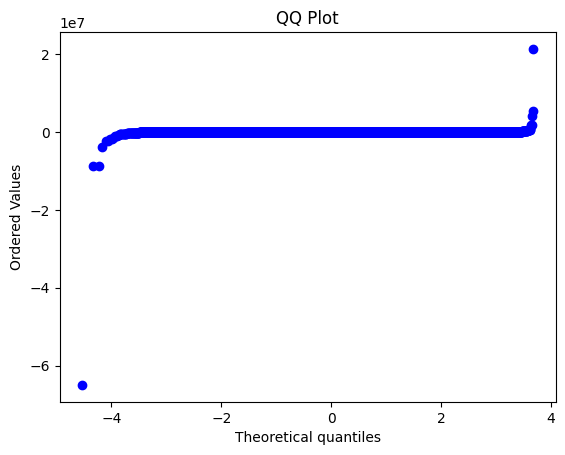

In [75]:
import scipy.stats as stats
import matplotlib.pyplot as plt
df3 = df2['부가가치율']

# QQ 플롯 생성
stats.probplot(df3, dist="norm", plot=plt)
plt.title("QQ Plot")
plt.show()
